# Practical 9: Comparing Linear Regression Models

In [12]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

## 1. Generate Random Data

Let's generate 100 random x values and calculate corresponding y values using a simple linear function with noise.

Sample data points:


,x,y
0,3.745401,12.664897
1,9.507143,23.416271
2,7.319939,19.823400
3,5.986585,12.998032
4,1.560186,7.681029


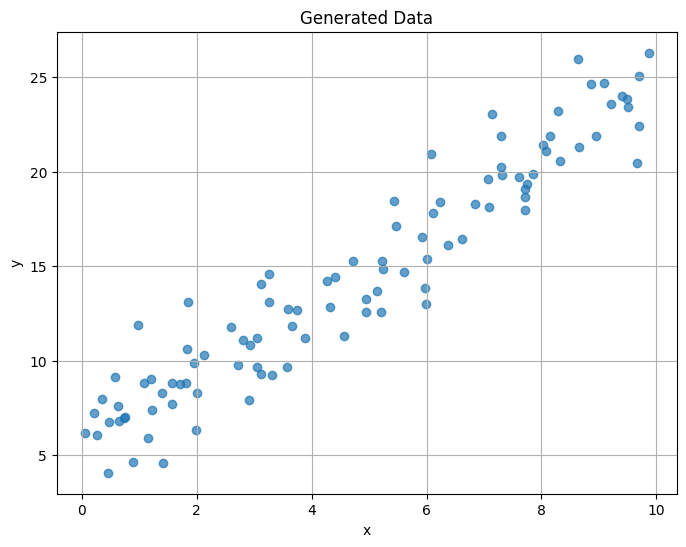

In [13]:
# Generate 100 random x values between 0 and 10
x = np.random.uniform(0, 10, 100)

# Calculate y values using y = 2x + 5 + random noise
y = 2 * x + 5 + np.random.normal(0, 2, 100)

# Display first 5 data points
data_sample = pd.DataFrame({'x': x[:5], 'y': y[:5]})
print("Sample data points:")
display(data_sample)

# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.7)
plt.title('Generated Data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

## 2. Build Regression Models

Now let's create regression models using both NumPy and SciPy.

In [14]:
# NumPy regression model
numpy_slope, numpy_intercept = np.polyfit(x, y, 1)
numpy_y_pred = numpy_slope * x + numpy_intercept

# SciPy regression model
scipy_slope, scipy_intercept, r_value, p_value, std_err = stats.linregress(x, y)
scipy_y_pred = scipy_slope * x + scipy_intercept

# Print model coefficients and statistics
print("NumPy Model:")
print(f"  Slope: {numpy_slope:.4f}")
print(f"  Intercept: {numpy_intercept:.4f}")
print("\nSciPy Model:")
print(f"  Slope: {scipy_slope:.4f}")
print(f"  Intercept: {scipy_intercept:.4f}")
print(f"  R-value: {r_value:.4f}")
print(f"  R-squared: {r_value**2:.4f}")
print(f"  P-value: {p_value:.8f}")
print(f"  Standard Error: {std_err:.4f}")

NumPy Model:
  Slope: 1.9080
  Intercept: 5.4302

SciPy Model:
  Slope: 1.9080
  Intercept: 5.4302
  R-value: 0.9530
  R-squared: 0.9081
  P-value: 0.00000000
  Standard Error: 0.0613


## 3. Visualize Both Models

Let's plot our data points and both regression lines.

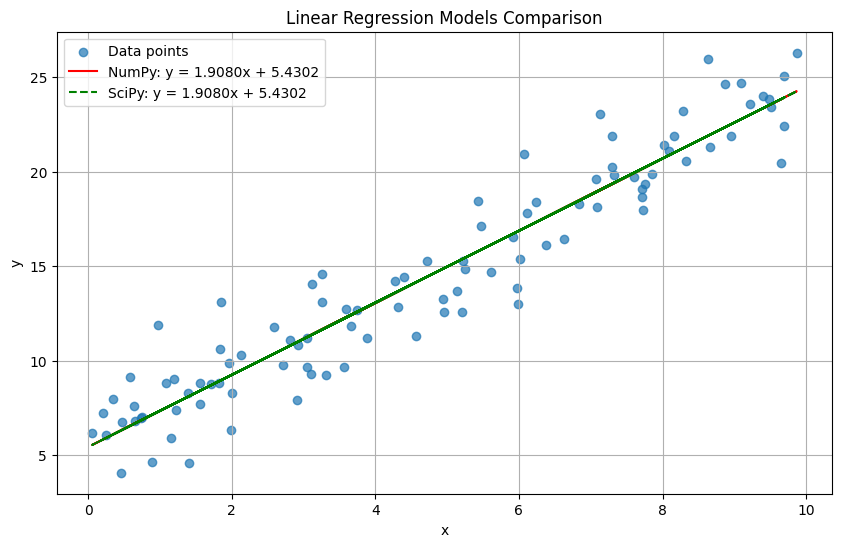

In [15]:
# Plot data and regression lines
plt.figure(figsize=(10, 6))

# Plot original data points
plt.scatter(x, y, alpha=0.7, label='Data points')

# Plot NumPy regression line
plt.plot(x, numpy_y_pred, 'r-', label=f"NumPy: y = {numpy_slope:.4f}x + {numpy_intercept:.4f}")

# Plot SciPy regression line
plt.plot(x, scipy_y_pred, 'g--', label=f"SciPy: y = {scipy_slope:.4f}x + {scipy_intercept:.4f}")

plt.title('Linear Regression Models Comparison')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## 4. Modify Data and Observe Effects

Let's modify our data in different ways and see how it affects the statistical metrics.


--- Original Data ---
R-value: 0.9530
P-value: 0.00000000
Standard Error: 0.0613


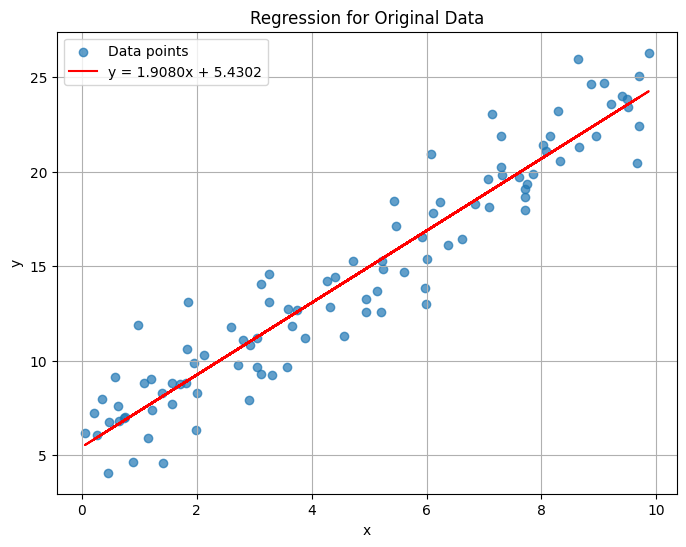

In [16]:
# Function to run regression and show results
def analyze_data(x, y, experiment_name):
    # Run SciPy regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    y_pred = slope * x + intercept
    
    # Print results
    print(f"\n--- {experiment_name} ---")
    print(f"R-value: {r_value:.4f}")
    print(f"P-value: {p_value:.8f}")
    print(f"Standard Error: {std_err:.4f}")
    
    # Plot data and regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, alpha=0.7, label='Data points')
    plt.plot(x, y_pred, 'r-', label=f"y = {slope:.4f}x + {intercept:.4f}")
    plt.title(f'Regression for {experiment_name}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return r_value, p_value, std_err

# Original data analysis
original_stats = analyze_data(x, y, "Original Data")


--- Added Noise ---
R-value: 0.7042
P-value: 0.00000000
Standard Error: 0.1948


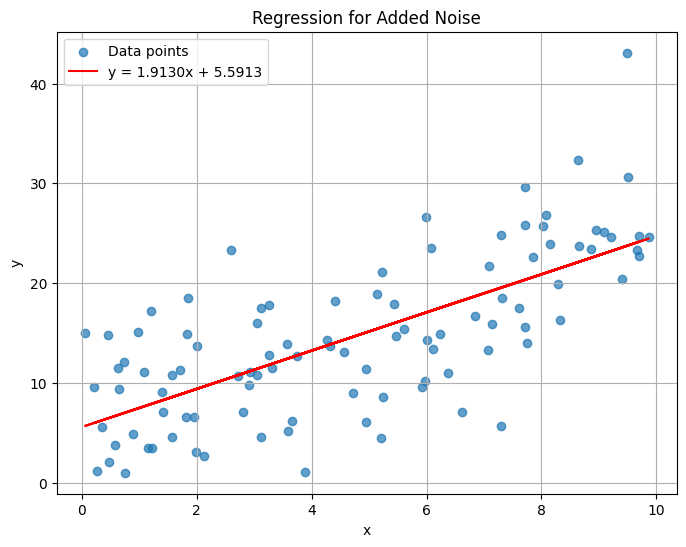

In [17]:
# 1. Add more noise to the data
y_noisy = y + np.random.normal(0, 5, 100)
noise_stats = analyze_data(x, y_noisy, "Added Noise")


--- Added Outliers ---
R-value: 0.7237
P-value: 0.00000000
Standard Error: 0.1706


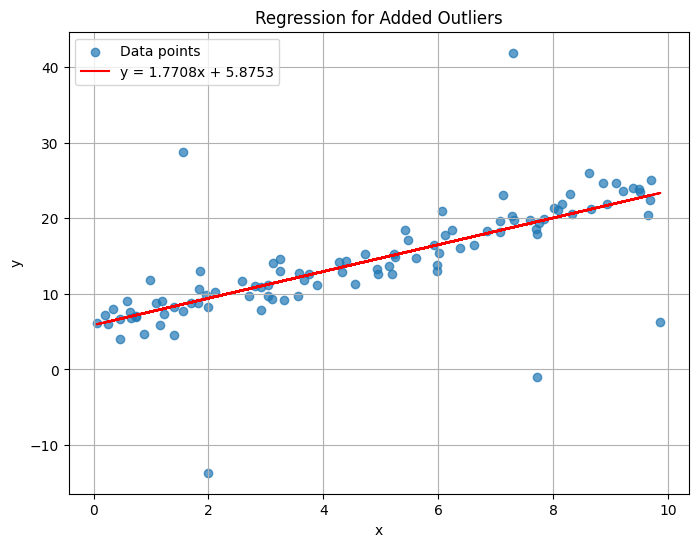

In [18]:
# 2. Add outliers to the data
y_outliers = y.copy()
# Add 5 outliers
outlier_indices = np.random.choice(range(100), 5, replace=False)
for idx in outlier_indices:
    y_outliers[idx] += 20 if np.random.random() > 0.5 else -20

outlier_stats = analyze_data(x, y_outliers, "Added Outliers")


--- Stronger Relationship ---
R-value: 0.9966
P-value: 0.00000000
Standard Error: 0.0169


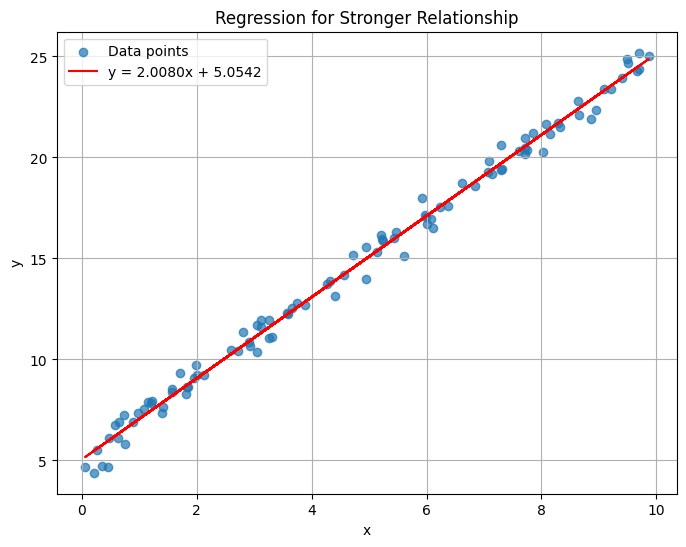

In [19]:
# 3. Make relationship stronger (less noise)
y_stronger = 2 * x + 5 + np.random.normal(0, 0.5, 100)  # Using less noise
stronger_stats = analyze_data(x, y_stronger, "Stronger Relationship")


--- Non-linear Relationship ---
R-value: 0.9768
P-value: 0.00000000
Standard Error: 0.1501


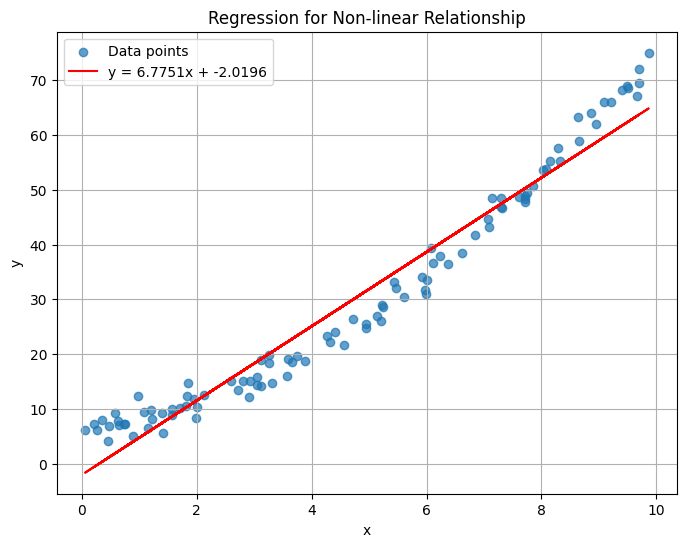

In [20]:
# 4. Introduce non-linear relationship
y_nonlinear = y + 0.5 * x**2
nonlinear_stats = analyze_data(x, y_nonlinear, "Non-linear Relationship")

## 5. Compare Results

Let's create a summary table of how each modification affected our metrics.

In [21]:
# Create a summary dataframe
summary_data = [
    ['Original Data', original_stats[0], original_stats[1], original_stats[2]],
    ['Added Noise', noise_stats[0], noise_stats[1], noise_stats[2]],
    ['Added Outliers', outlier_stats[0], outlier_stats[1], outlier_stats[2]],
    ['Stronger Relationship', stronger_stats[0], stronger_stats[1], stronger_stats[2]],
    ['Non-linear Relationship', nonlinear_stats[0], nonlinear_stats[1], nonlinear_stats[2]]
]

summary_df = pd.DataFrame(summary_data, 
                         columns=['Experiment', 'R-value', 'P-value', 'Standard Error'])

# Format numbers for better display
summary_df['R-value'] = summary_df['R-value'].round(4)
summary_df['P-value'] = summary_df['P-value'].apply(lambda x: f"{x:.8f}")
summary_df['Standard Error'] = summary_df['Standard Error'].round(4)

# Display the summary
display(summary_df)

,Experiment,R-value,P-value,Standard Error
0,Original Data,0.9530,0.00000000,0.0613
1,Added Noise,0.7042,0.00000000,0.1948
2,Added Outliers,0.7237,0.00000000,0.1706
3,Stronger Relationship,0.9966,0.00000000,0.0169
4,Non-linear Relationship,0.9768,0.00000000,0.1501
